In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , losses ,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist , cifar10 ,fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("no of training dataset" , x_train.shape[0])
print("no of testing dataset" , x_test.shape[0])


no of training dataset 60000
no of testing dataset 10000


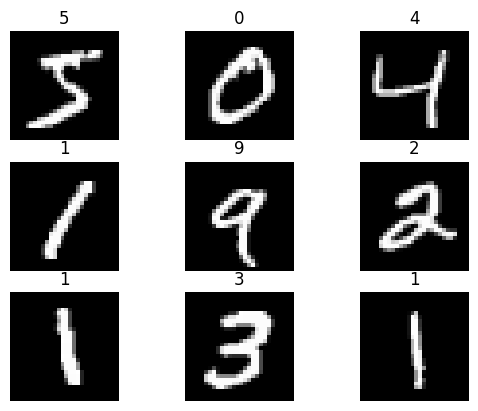

In [4]:
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


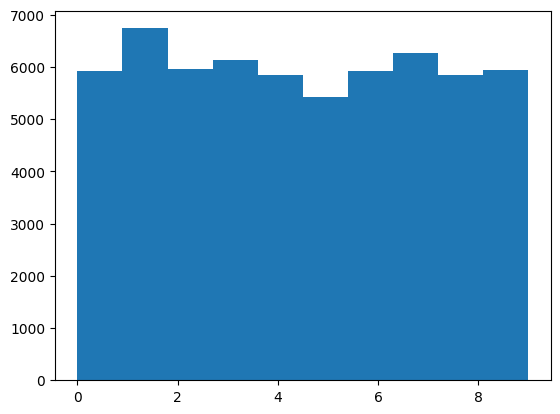

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

#Reshape
x_train_r = x_train.reshape(60000, 784)
x_test_r = x_test.reshape(10000, 784)
plt.hist(y_train, bins=10)
plt.show()

# applying normalization
x_train_r = x_train_r/255
x_test_r = x_test_r/255

In [6]:
model = Sequential()
model.add(Dense(16, input_dim=784 , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Fix: Call categorical_crossentropy directly
# loss = losses.sparse_categorical_crossentropy
# optimizer=optimizers.Adam(learning_rate=0.001)


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='spars_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,058 (62.73 KB)

 Trainable params: 16,058 (62.73 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(x_train_r, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7880 - loss: 0.6677
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9459 - loss: 0.1866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9552 - loss: 0.1528
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9583 - loss: 0.1354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9643 - loss: 0.1153
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1118
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9699 - loss: 0.0980
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9703 - loss: 0.0934
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0820
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0826


Text(0.5, 0, 'epoch')

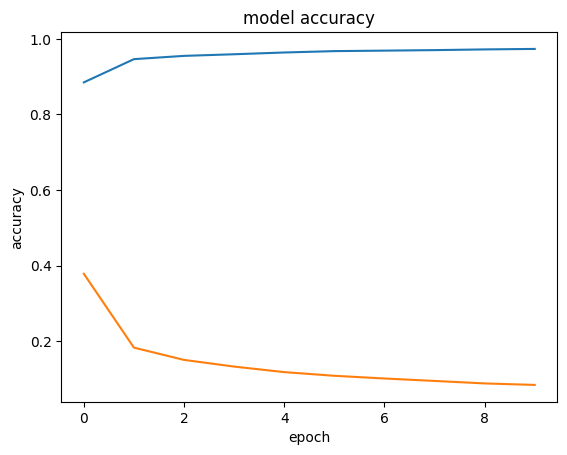

In [8]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [9]:
model.save("mymodel.h5")

In [10]:
OE_model = keras.models.load_model("mymodel.h5")


In [11]:
OE_model.evaluate(x_test_r, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9619 - loss: 0.1446


[0.12650930881500244, 0.9656999707221985]

In [12]:
OE_model.fit(x_train_r, y_train, epochs=10, batch_size=32)

Epoch 1/10


NotImplementedError: numpy() is only available when eager execution is enabled.

TypeError: Invalid shape (784,) for image data

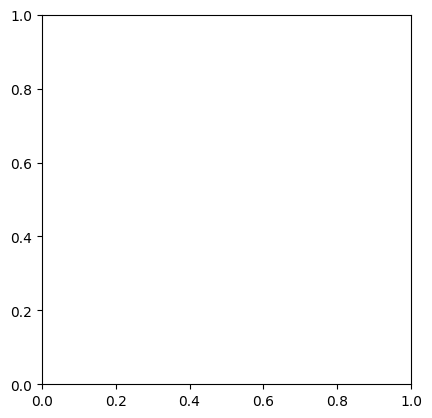

In [19]:
plt.imshow(x_test_r[2], cmap='gray')


In [16]:
np.argmax(model.predict(x_test_r[2:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(1)

In [23]:
# image net
dic = {0:'airplane' , 1:'automobile' , 2:'bird' , 3:'cat' , 4:'deer' , 5:'dog' , 6:'frog' , 7:'horse' , 8:'ship' , 9:'truck'}
#
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

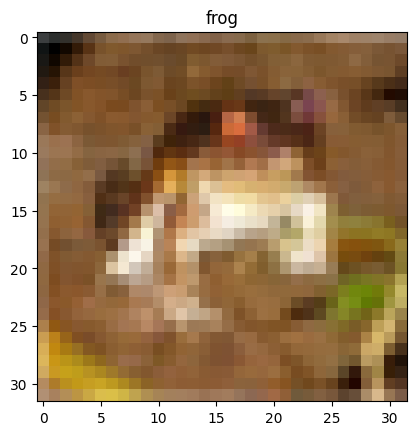

In [25]:
plt.imshow(x_train[0])
plt.title(dic[y_train[0][0]])
plt.show()

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [45]:
x_train_r = x_train.reshape(50000, 3072)
x_test_r = x_test.reshape(10000, 3072)

x_train_r = x_train_r/255
x_test_r = x_test_r/255

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [48]:
model = Sequential()
model.add(Dense(16, input_dim=3072 , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Fix: Call categorical_crossentropy directly
# loss = losses.sparse_categorical_crossentropy
# optimizer=optimizers.Adam(learning_rate=0.001)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='spars_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,666 (205.73 KB)

 Trainable params: 52,666 (205.73 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train_r, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10), output.shape=(None, 10)

In [44]:
# activation function
def my_sigmoid(x) :
  return 1/(1+np.exp(-x))

my_sigmoid(0)

np.float64(0.5)

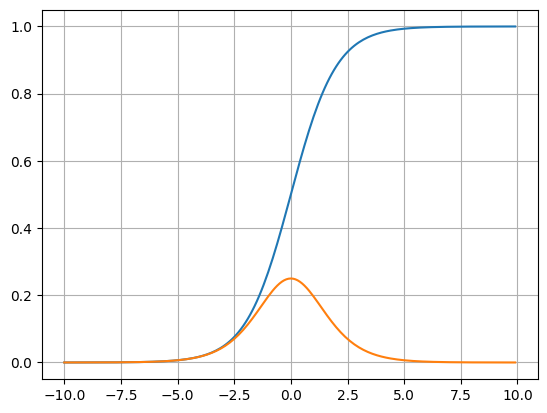

In [51]:
x = np.arange(-10,10,0.1)
y = my_sigmoid(x)
y_div = y*(1-y)
plt.plot(x,y)
plt.plot(x,y_div)
plt.grid()
plt.show()

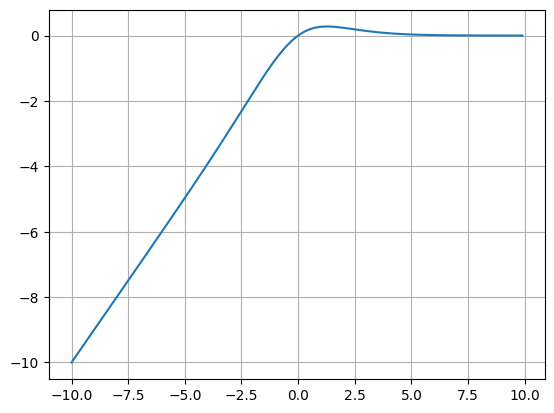

In [67]:
def my_swish (x):
  return x*my_sigmoid(-1*x)

x = np.arange(-10,10,0.1)
y = my_swish(x)

plt.plot(x,y)
plt.grid()
plt.show()